In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Sellers

🎯 Our goal is to find sellers who have repeatedly been underperforming vs. others, and understand why.  
This will help us shape our recommendations about how to improve Olist's profit margin for the future.

❗️ Long Notebook. Once you've read a section, you can collapse it.
<details>
    <summary> <i>[remainder] Notebook best practices</i></summary>

- Code your logic so that your Notebook can always be run from top to bottom without crashing (`Cell --> Run All`)
- Name your variables carefully 
- Use dummy names such as `tmp` for intermediary steps when you know you won't need them later
- Clear your code and merge cells when relevant to minimize Notebook size (`Shift-M`)
- Hide your cell output if you don't need to see it anymore (double click on the red `Out[]:` section to the left of your cell).
- Make heavy use of jupyter nbextention `Collapsable Headings` and `Table of Content` (call a TA if you can't find them)
- Use the following shortcuts 
    - `a` to insert a cell above
    - `b` to insert a cell below
    - `dd` to delete a cell
    - `esc` and `arrows` to move between cells
    - `Shift-Enter` to execute cell and move focus to the next one
    - use `Shift + Tab` when you're between method brackets e.g. `groupby()` to get the docs! Repeat a few times to open it permanently

</details>





## 1 - `olist/seller.py`  

In a process similar to `order.py`, we have coded for you the module `olist/seller.py` containing a class `Seller` with a method `Seller().get_training_data` that will return a DataFrame with the following features:
  
| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `seller_id` 	| str 	| the id of the seller **UNIQUE** 	|
| `seller_city` 	| str 	| the city where seller is located 	|
| `seller_state` 	| str 	| the state where seller is located 	|
| `delay_to_carrier` 	| float 	| returns 0 if the order is delivered before the shipping_limit_date, otherwise the value of the delay 	|
| `wait_time` 	| float 	| average wait_time (duration of deliveries) per seller 	|
| `date_first_sale` 	| datetime 	| date of the first sale on Olist 	|
| `date_last_sale` 	| datetime 	| date of the last sale on Olist 	|
| `months_on_olist` 	| float 	| round number of months  on Olist	|
| `share_of_five_stars` 	| float 	| share of five-star reviews for orders in which the seller was involved 	|
| `share_of_one_stars` 	| float 	| share of one-star reviews for orders in which the seller was involved 	|
| `review_score` 	| float 	| average review score for orders in which the seller was involved 	|
| `n_orders` 	| int 	| number of unique orders the seller was involved with 	|
| `quantity` 	| int 	| total number of items sold by this seller 	|
| `quantity_per_order` 	| float 	| average number of items per order for this seller 	|
| `sales` 	| float 	| total sales associated with this seller (excluding freight value) in BRL 	|  

❓ **Import your new class below and check out your training dataframe !** Take time to look at the code and understand exactly what has been computed for you

In [3]:
from olist.seller import Seller

🤔 One last thing remains to be computed for each seller:
* the proportion of extremely high reviews (`share_of_five_stars`) and the proportion of extremely poor reviews (`share_of_one_stars`)
* the (average) `review_score`

😱 Each low-rated order will indeed have a negative impact on Olist's reputation and this is modeled by the `cost_of_review`.  

This will help us compute the total `cost_of_review` per seller later on!

❓ **Implement the last method that has been left for you `get_review_score()`**

In [4]:
seller = Seller()

In [69]:
order_items = seller.order.data["order_items"][["order_id", "seller_id"]]
order_items.info()
order_items.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   order_id   112650 non-null  object
 1   seller_id  112650 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202


In [70]:
review_scores = seller.order.get_review_score()
review_scores.info()
review_scores.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          99224 non-null  object
 1   dim_is_five_star  99224 non-null  int64 
 2   dim_is_one_star   99224 non-null  int64 
 3   review_score      99224 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.0+ MB


,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4


In [71]:
items_with_reviews = order_items.merge(review_scores, how="left", on="order_id")
items_with_reviews.info()
items_with_reviews.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113314 entries, 0 to 113313
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          113314 non-null  object 
 1   seller_id         113314 non-null  object 
 2   dim_is_five_star  112372 non-null  float64
 3   dim_is_one_star   112372 non-null  float64
 4   review_score      112372 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.2+ MB


,order_id,seller_id,dim_is_five_star,dim_is_one_star,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1.0,0.0,5.0


In [72]:
items_with_reviews["seller_id"].nunique()

3095

In [73]:
# Some fancy optimized code given a dataframe
# mean = X_stid.mean()
# sigma = X_stid.std()
# X_stid = (X_stid - mean) / sigma

In [74]:
sellers_with_reviews = items_with_reviews.groupby("seller_id").agg({"dim_is_one_star":"sum", "dim_is_five_star":"sum", "review_score":"mean"}).reset_index()
sellers_with_reviews["dim_is_one_star"] = sellers_with_reviews["dim_is_one_star"]/ sellers_with_reviews.shape[0]
sellers_with_reviews["dim_is_five_star"] = sellers_with_reviews["dim_is_five_star"]/ sellers_with_reviews.shape[0]


In [75]:
sellers_with_reviews.info()
sellers_with_reviews.sort_values("dim_is_one_star", ascending=False).head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seller_id         3095 non-null   object 
 1   dim_is_one_star   3095 non-null   float64
 2   dim_is_five_star  3095 non-null   float64
 3   review_score      3090 non-null   float64
dtypes: float64(3), object(1)
memory usage: 96.8+ KB


,seller_id,dim_is_one_star,dim_is_five_star,review_score
1535,7c67e1448b00f6e969d365cea6b010ab,0.104362,0.141195,3.348208
881,4a3ca9315b744ce9f8e9374361493884,0.094992,0.305977,3.803931
368,1f50f920176fa81dab994f9023523100,0.091115,0.354120,3.982402
1235,6560211a19b47992c3666cc44a7e94c0,0.086268,0.330856,3.909406
192,1025f0e2d44d7041d6cf58b6550e0bfa,0.075929,0.235541,3.849755


🧪 Test your code below

In [78]:
from nbresult import ChallengeResult

tmp = Seller().get_training_data()
result = ChallengeResult('seller',
    shape = tmp.shape,
    median = tmp.review_score.median()
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/branchedelac/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/branchedelac/code/branchedelac/04-Decision-Science/03-Linear-Regression/data-sellers/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 2 items

test_seller.py::TestSeller::test_median_review_score PASSED              [ 50%]
test_seller.py::TestSeller::test_shape PASSED                            [100%]

============================== 2 passed in 0.27s ===============================


💯 You can commit your code:

git add tests/seller.pickle

git commit -m 'Completed seller step'

git push origin master



## 2 - Sellers' Exploration

### (2.1) Plots

👉 Let's start with some initial ***`EDA - Exploratory Data Analysis`*** about these sellers.

- 📈 Plot the distribution of each numerical variable of the dataset in one large figure
- 👀 Do you notice any outliers?
- What's the median of orders per seller ❓
- How does the distribution of this variable look like ❓

In [7]:
sellers_df = seller.get_training_data()
sellers_df.info()
sellers_df.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967 entries, 0 to 2966
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   seller_id           2967 non-null   object        
 1   seller_city         2967 non-null   object        
 2   seller_state        2967 non-null   object        
 3   delay_to_carrier    2967 non-null   float64       
 4   wait_time           2967 non-null   float64       
 5   date_first_sale     2967 non-null   datetime64[ns]
 6   date_last_sale      2967 non-null   datetime64[ns]
 7   months_on_olist     2967 non-null   float64       
 8   n_orders            2967 non-null   int64         
 9   quantity            2967 non-null   int64         
 10  quantity_per_order  2967 non-null   float64       
 11  sales               2967 non-null   float64       
 12  dim_is_one_star     2967 non-null   float64       
 13  dim_is_five_star    2967 non-null   float64     

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,dim_is_one_star,dim_is_five_star,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.0,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.0,218.7,0.000323,0.000323,3.0


In [14]:
numerical_cols = sellers_df.select_dtypes(include=np.number).head(1)
numerical_cols

,delay_to_carrier,wait_time,months_on_olist,n_orders,quantity,quantity_per_order,sales,dim_is_one_star,dim_is_five_star,review_score
0,0.0,13.018588,4.0,3,3,1.0,218.7,0.000323,0.000323,3.0


----- Distribution of delay_to_carrier : -----


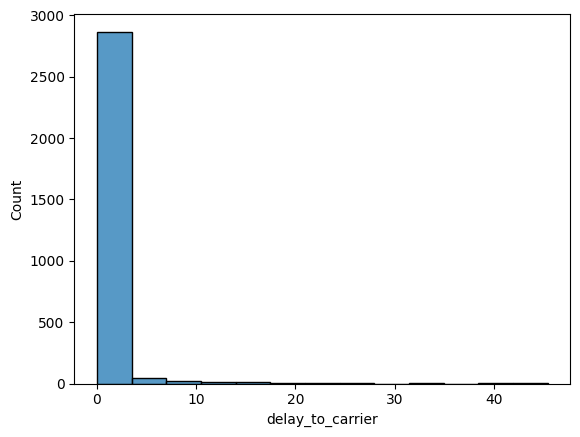

----- Distribution of wait_time : -----


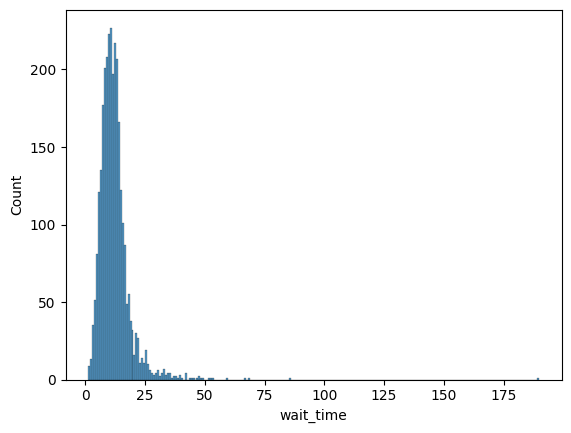

----- Distribution of months_on_olist : -----


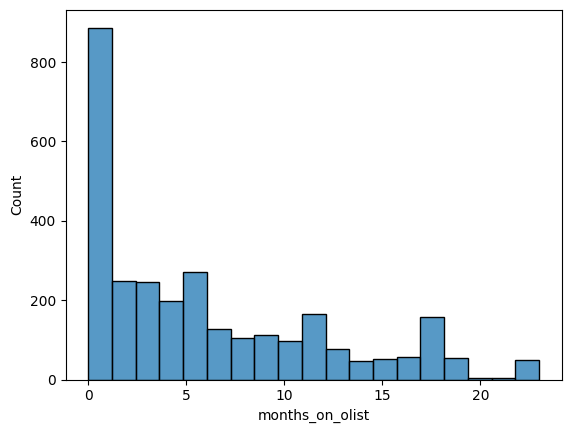

----- Distribution of n_orders : -----


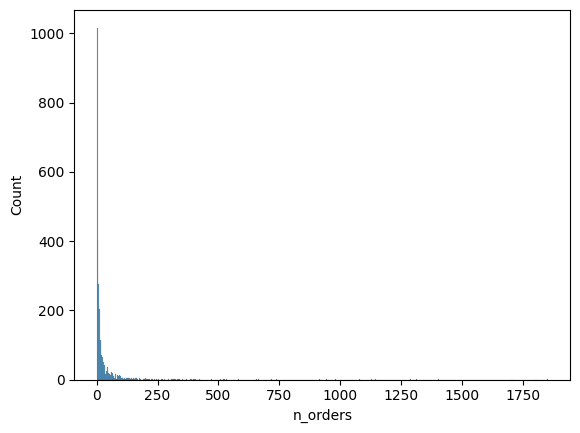

----- Distribution of quantity : -----


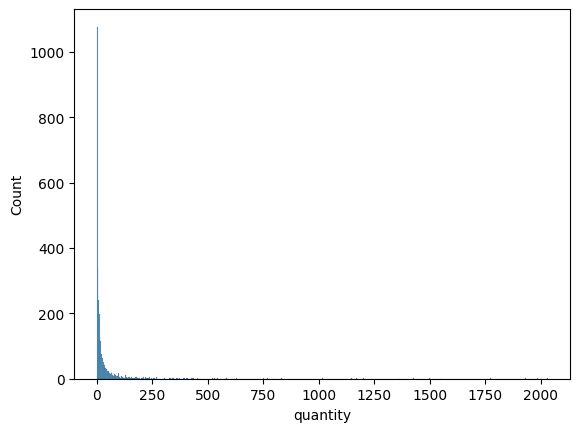

----- Distribution of quantity_per_order : -----


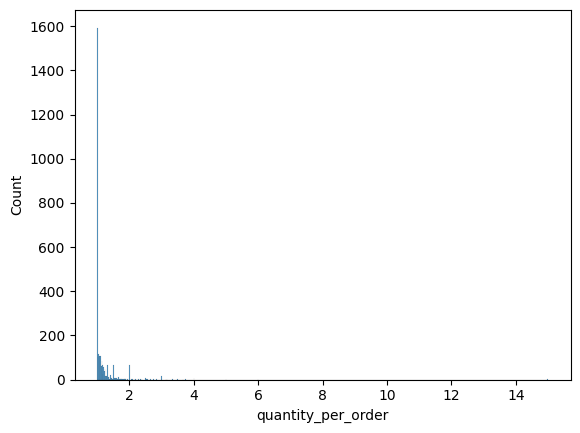

----- Distribution of sales : -----


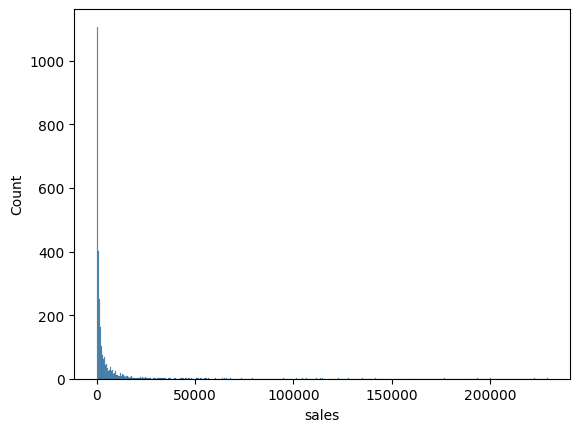

----- Distribution of dim_is_one_star : -----


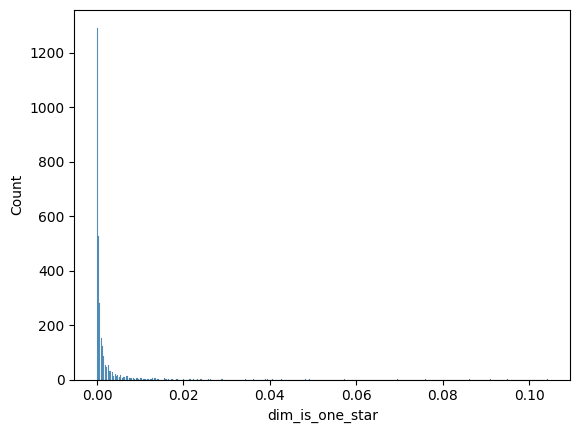

----- Distribution of dim_is_five_star : -----


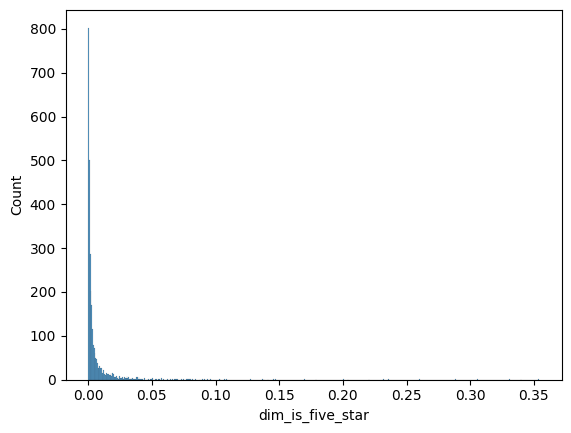

----- Distribution of review_score : -----


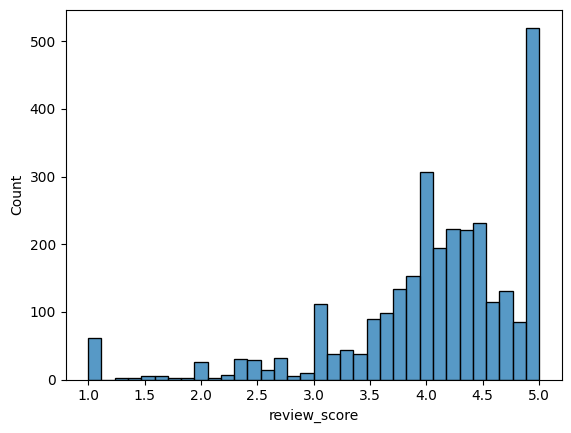

In [25]:
for col in sellers_df.select_dtypes(include=np.number).columns:
    print(f"----- Distribution of {col} : -----")
    sns.histplot(sellers_df[col])
    plt.show()

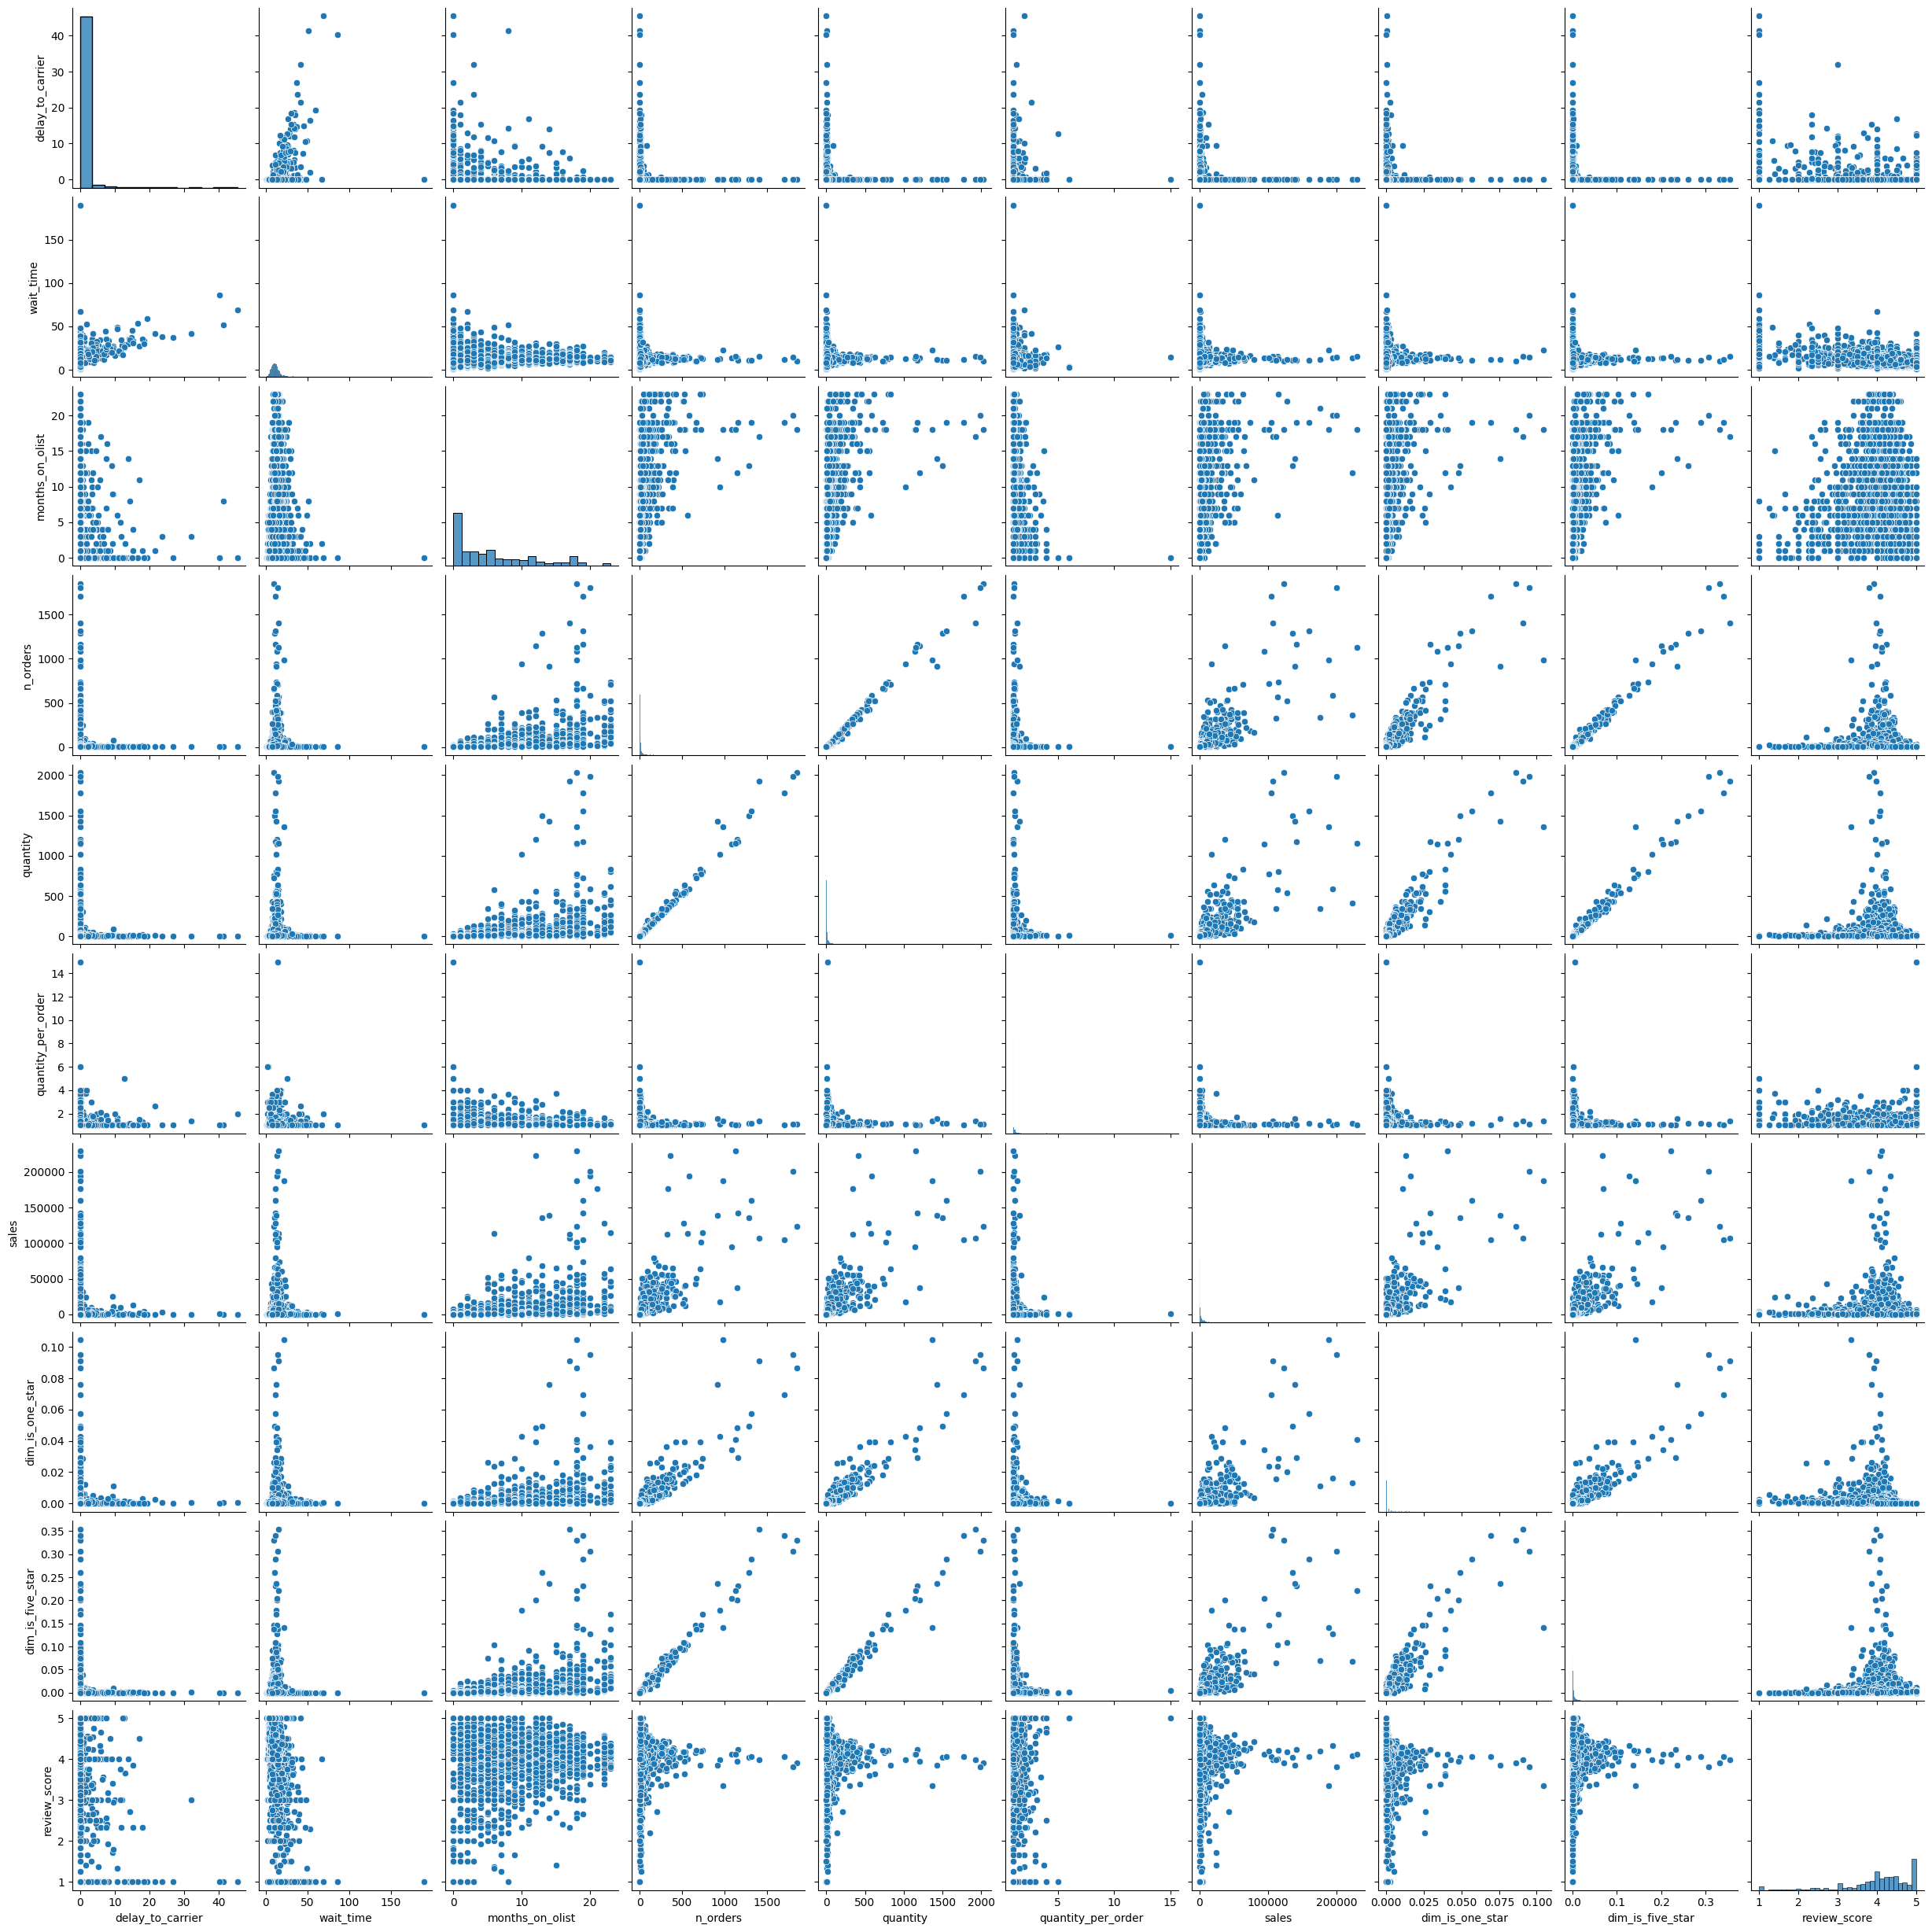

In [9]:
sns.pairplot(sellers_df.select_dtypes(include=np.number))

💡There seems to be a group of sellers which stands out for having very low review scores! 

📊 Let's investigate graphically it:
* Using `plotly`, create a `scatterplot` of `delay_to_carrier` against `wait_time`, varying bubble size by total `sales` for that seller, and coloring by `review_score`. 

In [ ]:
# YOUR CODE HERE

Feel free to change values `x`, `y`, `color` and `size` to try identify who are the worst sellers

### (2.2) Model out `review_score` with OLS

⚠️ Scatter plots have their limits. 

💡 A more rigorous way to explain **`sellers' review_score`** is to **model the impact of various features on `review_score` with a `multivariate-OLS` in `statsmodels`**.

👉 Create an OLS with numerical features of your choice. 

❓ What are the most impactful ones? 

⚠️ Don't forget to standardize your features using the `standardize`function below to compare the regression coefficients together. 

In [ ]:
def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized

In [ ]:
# YOUR CODE HERE

📊 Draw a `bar_plot` with sorted coefficients.

In [ ]:
# YOUR CODE HERE

👉 Finally, investigate your model's performance (`R-squared`) and `residuals`

In [ ]:
# YOUR CODE HERE

👉 Compare the real review scores and the predicted scores by showing them on the same graph.

In [ ]:
# YOUR CODE HERE

👉 Plot the residuals

In [ ]:
# YOUR CODE HERE

### (2.3) Add the `seller_state` to your analysis

❓ We haven't used information about `seller_state` yet.  
- Create a new OLS model regressing `review_score` on only on `seller_states` .
- Analyse your significant features using `return_significative_coef(model)` coded for you in `olist/utils.py`
- What are the best states in terms of `review_score`? 

<details>
    <summary>- Hints -</summary>
        
⚠️ Be careful, `seller_state` is a categorical feature. 
    
💡 Use `C(a_cat_feature)` in the formula to tell the linear regression model which variables are categorical variables. It will create one boolean variable `is_cat_feature_xx` **per unique category** 

</details>

In [ ]:
# YOUR CODE HERE

☝️ Some states indeed have _significantly_ better reviews than others on average. 

🤔 Is it due to some lower `quantity_per_order`, lower `wait_time`, or `delay_to_carrier`?  Or is it due to some other factors that we haven't collected data about?

❓ **Try to isolate the impact of the `seller_state` from the rest by adding other continuous features to your OLS until `seller_states` is no longer statistically siginificant!**

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

☝️ After adding `wait_time` to our analysis, none of the 22 dummy variables `is_seller_state_xx` are statistically signigicant:

Given our small dataset (most states have a very limited number of sellers):
- We _cannot conclude_ that "some states are inherently better than other for reasons that would be independent of the `wait_time`" 
- In other words, we _cannot reject the hypothesis_ that "seller_state has no impact on review_score, other than through `wait_time`"

🏁 Congratulations!

💾 Commit and push :
* your ` sellers.ipynb`notebook 
* as well as `seller.py`